# CODSOFT DATA SCIENCE TASK 2 (MOVIE RATING PREDICTION)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler , StandardScaler

## Locating our data files present in CSV

In [2]:
movie = pd.read_csv('D:\CODSOFT\moviesdata.csv')
movie

,Movie IDs,Movie Name,Category
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [3]:
rating = pd.read_csv('D:\\CODSOFT\\ratingsdata.csv')
rating

,ID,Movie ID,Rating,Time Stamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [4]:
user =pd.read_csv('D:\\CODSOFT\\usersdata.csv')
user

,User ID,Gender,Age From,Age To,Zip Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,1060


In [5]:
movie.dropna(inplace = True)
rating.dropna(inplace = True)
user.dropna(inplace = True)

## Now combining all these three files (merging them)

In [6]:
data=pd.concat([movie,rating,user],axis=1)
data.head()

,Movie IDs,Movie Name,Category,ID,Movie ID,Rating,Time Stamp,User ID,Gender,Age From,Age To,Zip Code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,F,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,2460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455


## now droping unnecessary columns

In [7]:
movie.isnull().sum()

Movie IDs     0
Movie Name    0
Category      0
dtype: int64

In [8]:
rating.isnull().sum()

ID            0
Movie ID      0
Rating        0
Time Stamp    0
dtype: int64

In [9]:
user.isnull().sum()

User ID     0
Gender      0
Age From    0
Age To      0
Zip Code    0
dtype: int64

In [10]:
data.isnull().sum()

Movie IDs     996326
Movie Name    996326
Category      996326
ID                 0
Movie ID           0
Rating             0
Time Stamp         0
User ID       994169
Gender        994169
Age From      994169
Age To        994169
Zip Code      994169
dtype: int64

In [11]:
data

,Movie IDs,Movie Name,Category,ID,Movie ID,Rating,Time Stamp,User ID,Gender,Age From,Age To,Zip Code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,F,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,2460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,NaN,NaN,NaN,6040,1091,1,956716541,NaN,NaN,NaN,NaN,NaN
1000205,NaN,NaN,NaN,6040,1094,5,956704887,NaN,NaN,NaN,NaN,NaN
1000206,NaN,NaN,NaN,6040,562,5,956704746,NaN,NaN,NaN,NaN,NaN
1000207,NaN,NaN,NaN,6040,1096,4,956715648,NaN,NaN,NaN,NaN,NaN


## Cleaning the Data 

In [12]:
data.drop(['Time Stamp','Zip Code','Movie IDs'],axis=1,inplace=True)
data.head()

,Movie Name,Category,ID,Movie ID,Rating,User ID,Gender,Age From,Age To
0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,1.0,F,1.0,10.0
1,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,M,56.0,16.0
2,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,M,25.0,15.0
3,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,M,45.0,7.0
4,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,M,25.0,20.0


In [13]:
data.drop(['Age To'],axis=1,inplace=True)
data.head()

,Movie Name,Category,ID,Movie ID,Rating,User ID,Gender,Age From
0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,1.0,F,1.0
1,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,M,56.0
2,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,M,25.0
3,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,M,45.0
4,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,M,25.0


In [14]:
data.rename(columns={'Age From':'Age'},inplace=True)
data.head()

,Movie Name,Category,ID,Movie ID,Rating,User ID,Gender,Age
0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,1.0,F,1.0
1,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,M,56.0
2,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,M,25.0
3,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,M,45.0
4,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,M,25.0


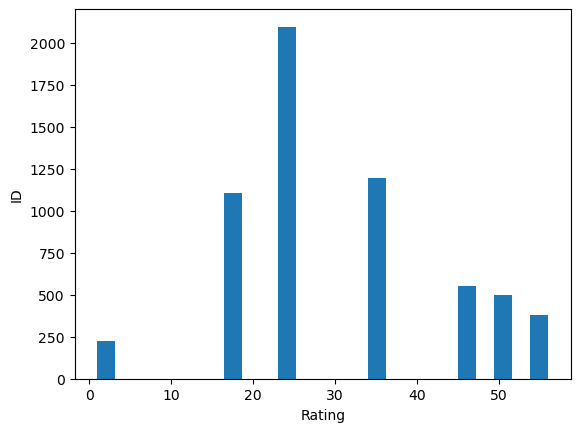

In [15]:
data.Age.plot.hist(bins=25)
plt.ylabel('ID')
plt.xlabel('Rating')
plt.show()

In [16]:
data.Gender = data.Gender.map({'M':0,'F':1}) 

<AxesSubplot:xlabel='Gender', ylabel='count'>

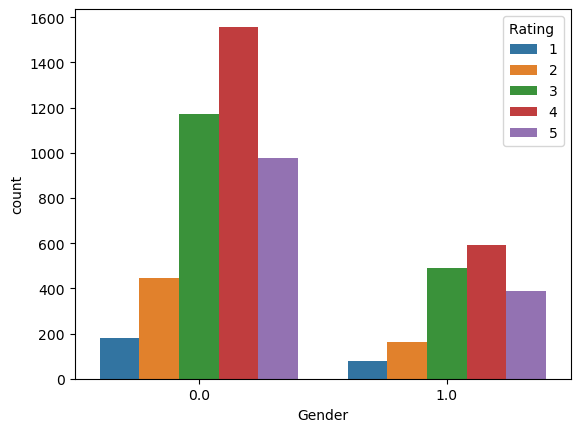

In [17]:

sns.countplot(x=data['Gender'],hue=data['Rating '])

## Spliting the data into features of X and Y

In [18]:
data.head()

,Movie Name,Category,ID,Movie ID,Rating,User ID,Gender,Age
0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,1.0,1.0,1.0
1,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,0.0,56.0
2,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,0.0,25.0
3,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,0.0,45.0
4,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,0.0,25.0


In [19]:
data.isnull().sum()

Movie Name    996326
Category      996326
ID                 0
Movie ID           0
Rating             0
User ID       994169
Gender        994169
Age           994169
dtype: int64

In [20]:
a = data.drop(['Movie Name','Category','Rating '], axis =1)
b = data['Rating '] 

scaler = StandardScaler()
a_scaled = scaler.fit_transform(a)

In [21]:
a.head()

,ID,Movie ID,User ID,Gender,Age
0,1,1193,1.0,1.0,1.0
1,1,661,2.0,0.0,56.0
2,1,914,3.0,0.0,25.0
3,1,3408,4.0,0.0,45.0
4,1,2355,5.0,0.0,25.0


In [22]:
b.head()

0    5
1    3
2    3
3    4
4    5
Name: Rating , dtype: int64

In [23]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=10)

In [24]:
scaler = StandardScaler()
a_test.fillna(a_test.mean(), inplace=True)
a_test_scaled = scaler.fit_transform(a_test)

a_train.fillna(a_train.mean(), inplace=True)
a_train_scaled = scaler.fit_transform(a_train)

In [25]:
a_train.head()

,ID,Movie ID,User ID,Gender,Age
104776,695,1258,3028.115369,0.28738,30.638484
244345,1472,3000,3028.115369,0.28738,30.638484
927514,5605,2841,3028.115369,0.28738,30.638484
918300,5550,3135,3028.115369,0.28738,30.638484
527518,3261,3316,3028.115369,0.28738,30.638484


In [26]:
b_train.head()

104776    5
244345    5
927514    5
918300    5
527518    3
Name: Rating , dtype: int64

In [27]:
model=LogisticRegression(max_iter=5000)
model.fit(a_train,b_train)

LogisticRegression(max_iter=5000)

In [28]:
model.predict(a_test)

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)